In [126]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Generate dataset

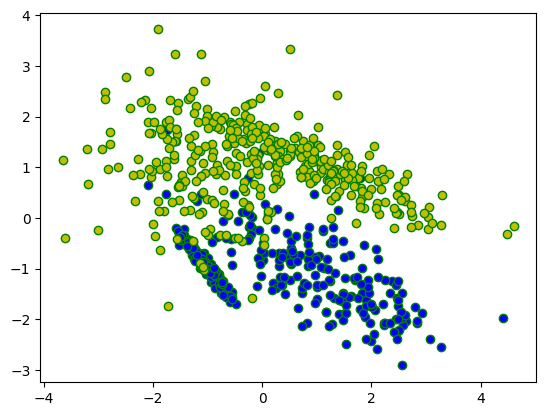

In [319]:
circ_X, circ_y = datasets.make_classification(n_samples=1000, n_features=2, n_redundant=0)
data = np.insert(circ_X, obj=2, values=circ_y , axis=1)
train, test = train_test_split(data, shuffle=True)
plt.plot(train[train[:, 2] == 0][:, 0], train[train[:, 2] == 0][:, 1], 'ob', markeredgecolor='g')
plt.plot(train[train[:, 2] == 1][:, 0], train[train[:, 2] == 1][:, 1], 'oy', markeredgecolor='g')

# Ridge Classifier

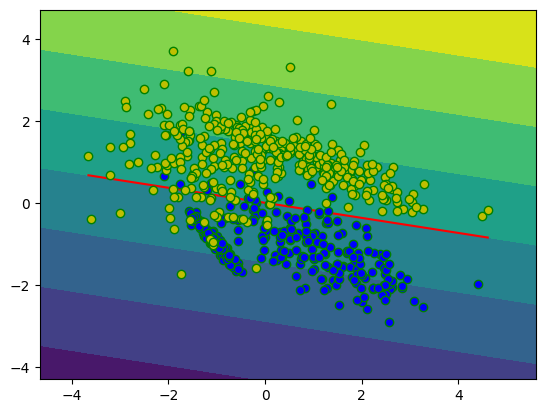

In [320]:
ridge = RidgeClassifier(alpha=10)
ridge.fit(train[:, [0,1]], train[:, 2])
a, b, c = ridge.coef_[0][0], ridge.coef_[0][1], ridge.intercept_[0]
x_min = min(data[:, 0])
y_min = -1*(a*x_min + c)/b
x_max = max(data[:, 0])
y_max = -1*(a*x_max + c)/b
line = np.linspace(start=[x_min, y_min], stop=[x_max, y_max])

DecisionBoundaryDisplay.from_estimator(ridge, circ_X)
plt.plot(line[:, 0], line[:, 1], color='r')
plt.plot(train[train[:, 2] == 0][:, 0], train[train[:, 2] == 0][:, 1], 'ob', markeredgecolor='g')
plt.plot(train[train[:, 2] == 1][:, 0], train[train[:, 2] == 1][:, 1], 'oy', markeredgecolor='g')

# Naive Bayes Gaussian

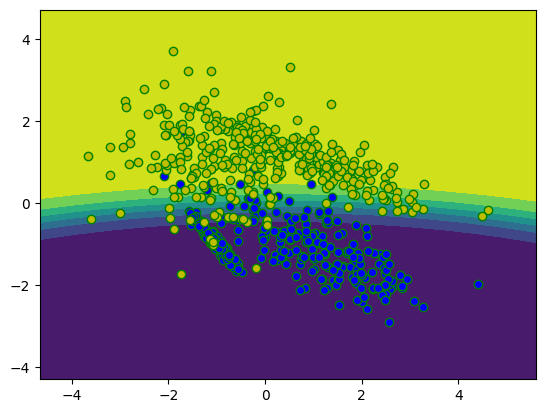

In [321]:
bayes = GaussianNB(var_smoothing=1e-3)
bayes.fit(train[:, [0,1]], train[:, 2])
DecisionBoundaryDisplay.from_estimator(bayes, circ_X)
plt.plot(train[train[:, 2] == 0][:, 0], train[train[:, 2] == 0][:, 1], 'ob', markeredgecolor='g')
plt.plot(train[train[:, 2] == 1][:, 0], train[train[:, 2] == 1][:, 1], 'oy', markeredgecolor='g')

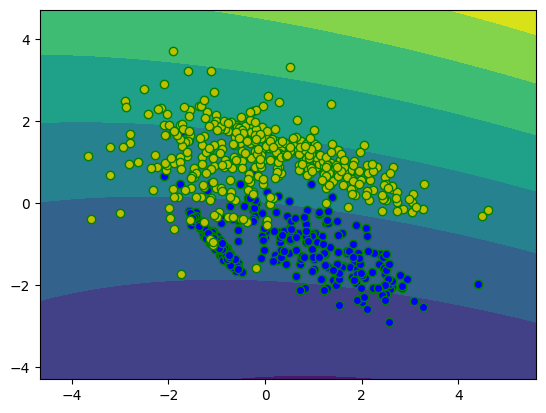

In [322]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

quad = QuadraticDiscriminantAnalysis(reg_param=0.5).fit(train[:, [0,1]], train[:, 2])
DecisionBoundaryDisplay.from_estimator(quad, circ_X)
plt.plot(train[train[:, 2] == 0][:, 0], train[train[:, 2] == 0][:, 1], 'ob', markeredgecolor='g')
plt.plot(train[train[:, 2] == 1][:, 0], train[train[:, 2] == 1][:, 1], 'oy', markeredgecolor='g')

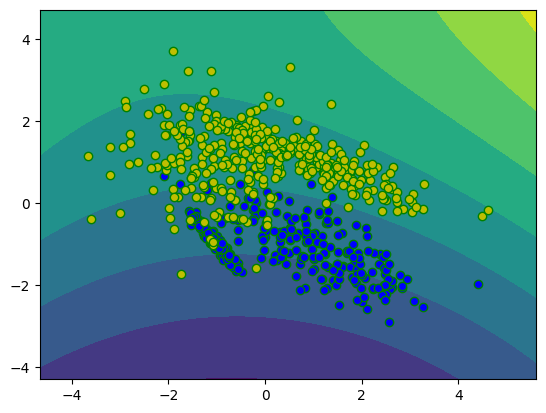

In [323]:
from sklearn.kernel_ridge import KernelRidge

kr = KernelRidge(gamma=0.014, kernel='polynomial', degree=4).fit(train[:, [0,1]], train[:, 2])
DecisionBoundaryDisplay.from_estimator(kr, circ_X)
plt.plot(train[train[:, 2] == 0][:, 0], train[train[:, 2] == 0][:, 1], 'ob', markeredgecolor='g')
plt.plot(train[train[:, 2] == 1][:, 0], train[train[:, 2] == 1][:, 1], 'oy', markeredgecolor='g')

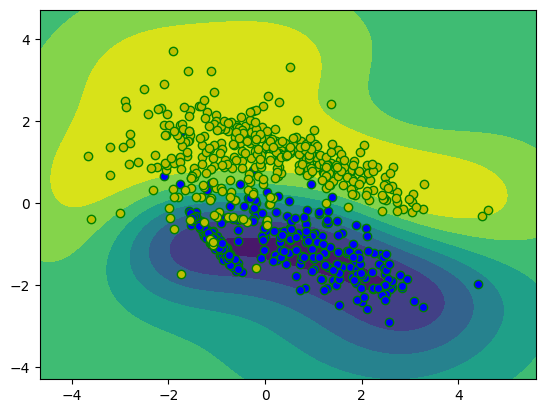

In [324]:
from sklearn.svm import SVR

svr = SVR(C=0.1, epsilon=0).fit(train[:, [0,1]], train[:, 2])
DecisionBoundaryDisplay.from_estimator(svr, circ_X)
plt.plot(train[train[:, 2] == 0][:, 0], train[train[:, 2] == 0][:, 1], 'ob', markeredgecolor='g')
plt.plot(train[train[:, 2] == 1][:, 0], train[train[:, 2] == 1][:, 1], 'oy', markeredgecolor='g')

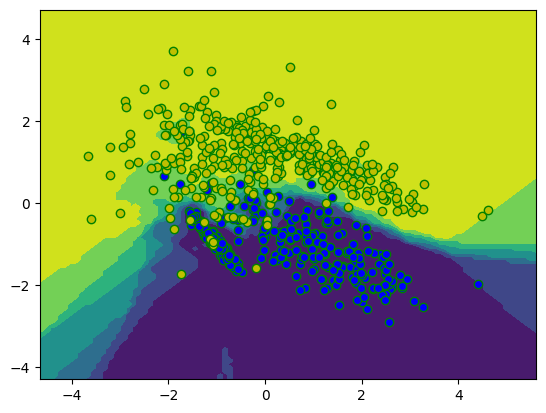

In [329]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10).fit(train[:, [0,1]], train[:, 2])
DecisionBoundaryDisplay.from_estimator(knn, circ_X)
plt.plot(train[train[:, 2] == 0][:, 0], train[train[:, 2] == 0][:, 1], 'ob', markeredgecolor='g')
plt.plot(train[train[:, 2] == 1][:, 0], train[train[:, 2] == 1][:, 1], 'oy', markeredgecolor='g')

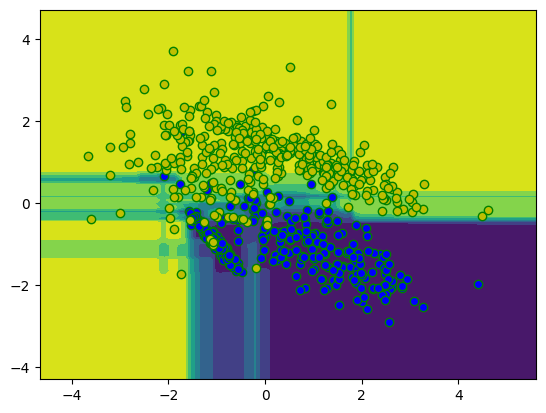

In [341]:
from sklearn.ensemble import GradientBoostingClassifier

tree = GradientBoostingClassifier(max_depth=7).fit(train[:, [0,1]], train[:, 2])
DecisionBoundaryDisplay.from_estimator(tree, circ_X)
plt.plot(train[train[:, 2] == 0][:, 0], train[train[:, 2] == 0][:, 1], 'ob', markeredgecolor='g')
plt.plot(train[train[:, 2] == 1][:, 0], train[train[:, 2] == 1][:, 1], 'oy', markeredgecolor='g')